# Baseball Case Study

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

To understand the columns meaning, follow the link given below to understand the baseball statistics: https://en.wikipedia.org/wiki/Baseball_statistics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading the dataset
df=pd.read_csv("baseball.csv")
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


Let us check the shape of the dataset

In [3]:
df.shape

(30, 17)

The dataset has 30 rows and 17 columns

In [4]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

# About the Columns

1. W – Win: number of games where pitcher was pitching while their team took the lead and went on to win, also the starter needs to pitch at least 5 innings of work (also related: winning percentage)
2. R – Runs scored: number of times a player crosses home plate
3. AB – At bat: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction
4. H – Hit: reaching base because of a batted, fair ball without error by the defense
5. 2B – Double: hits on which the batter reaches second base safely without the contribution of a fielding error
6. 3B – Triple: hits on which the batter reaches third base safely without the contribution of a fielding error
7. HR – Home runs: hits on which the batter successfully touched all four bases, without the contribution of a fielding error
8. BB – Base on balls (also called a "walk"): hitter not swinging at four pitches called out of the strike zone and awarded first base.
9. SO – Strikeouts: The number of times a player strikes out while at bat. SB – Bases Stolen: The total number of bases a player has stolen as a baserunner.
10. SB – Stolen base: number of bases advanced by the runner while the ball is in the possession of the defense
11. RA – Run average: number of runs allowed times nine divided by innings pitched
12. ER – Earned run: number of runs that did not occur as a result of errors or passed balls
13. ERA – Earned run average: total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched
14. CG – Complete game: number of games where player was the only pitcher for their team
15. SHO – Shutout: number of complete games pitched with no runs allowed
16. SV – Save: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings
17. E – Errors: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result

## Re-arranging the columns for better understanding

In [5]:
df=df[["R","AB","H","2B","3B","HR","BB","SO","SB","RA","ER","ERA","CG","SHO","SV","E","W"]]
df

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E,W
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88,95
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86,83
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79,81
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101,76
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86,74
5,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88,93
6,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93,87
7,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77,81
8,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95,80
9,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97,78


# EDA - Understanding the Dataset

In [6]:
df.dtypes

R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
W        int64
dtype: object

Looking at the above table, we can observe that apart from ERA (Earned run average), which is float datatype, all the others are of integer datatype

Checking for null values in the dataset

In [7]:
df.isnull().sum()

R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
W      0
dtype: int64

It is clear to note that there are no null values present in any of the columns in the given dataset

In [8]:
df.describe()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E,W
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333,80.966667
std,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889,10.453455
min,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000,63.000000
25%,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000,74.000000
50%,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000,81.000000
75%,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000,87.750000
max,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000,100.000000


From the above table, we see that the difference between the 75th percentile of some columns and the max values is quite high. This indicates the possibility of there being outliers.

<AxesSubplot:xlabel='R', ylabel='Density'>

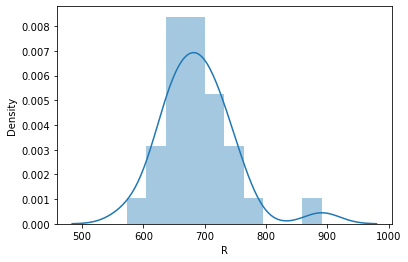

In [9]:
sb.distplot(df['R'], bins=10)

<AxesSubplot:xlabel='AB', ylabel='Density'>

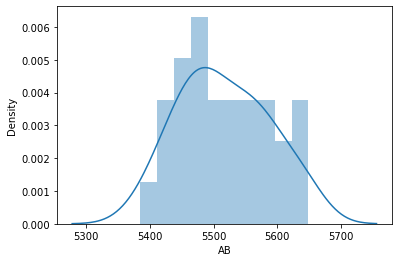

In [10]:
sb.distplot(df['AB'], bins=10)

<AxesSubplot:xlabel='H', ylabel='Density'>

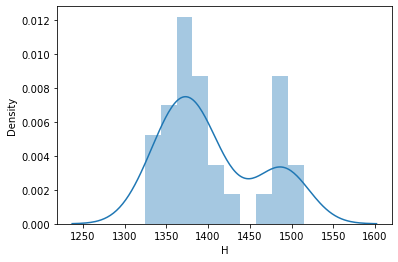

In [11]:
sb.distplot(df['H'], bins=10)

<AxesSubplot:xlabel='2B', ylabel='Density'>

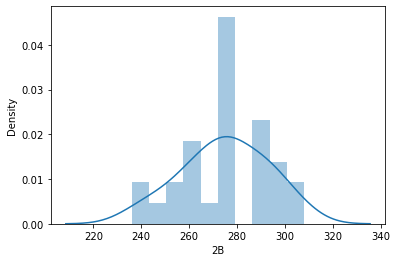

In [12]:
sb.distplot(df['2B'], bins=10)

<AxesSubplot:xlabel='3B', ylabel='Density'>

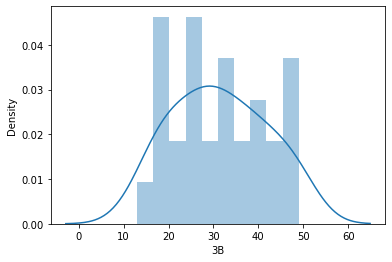

In [13]:
sb.distplot(df['3B'], bins=10)

<AxesSubplot:xlabel='HR', ylabel='Density'>

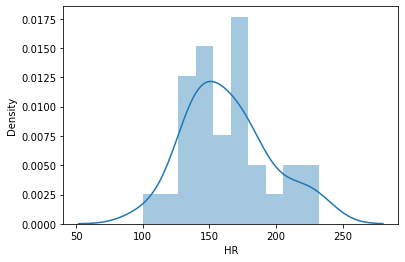

In [14]:
sb.distplot(df['HR'], bins=10)

<AxesSubplot:xlabel='BB', ylabel='Density'>

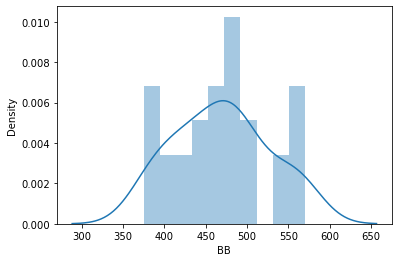

In [15]:
sb.distplot(df['BB'], bins=10)

<AxesSubplot:xlabel='SO', ylabel='Density'>

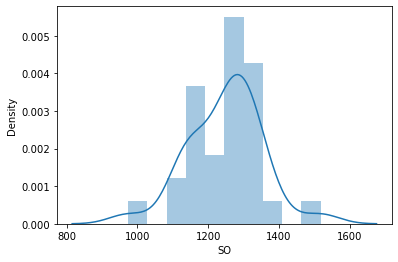

In [16]:
sb.distplot(df['SO'], bins=10)

<AxesSubplot:xlabel='SB', ylabel='Density'>

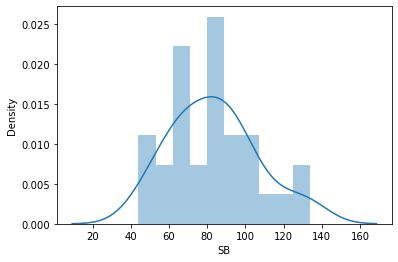

In [17]:
sb.distplot(df['SB'], bins=10)

<AxesSubplot:xlabel='RA', ylabel='Density'>

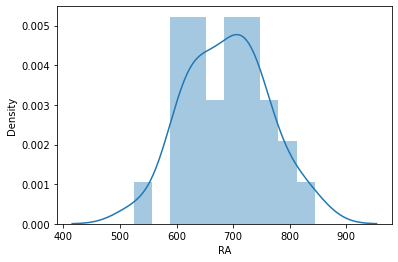

In [18]:
sb.distplot(df['RA'], bins=10)

<AxesSubplot:xlabel='ER', ylabel='Density'>

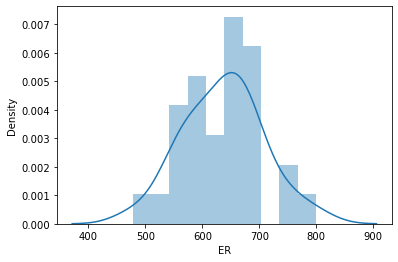

In [19]:
sb.distplot(df['ER'], bins=10)

<AxesSubplot:xlabel='ERA', ylabel='Density'>

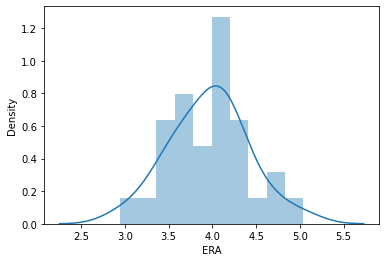

In [20]:
sb.distplot(df['ERA'], bins=10)

<AxesSubplot:xlabel='CG', ylabel='Density'>

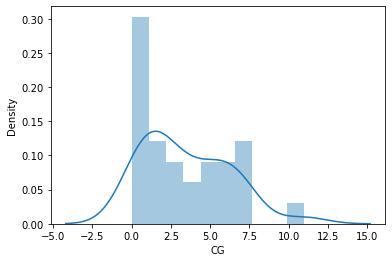

In [21]:
sb.distplot(df['CG'], bins=10)

<AxesSubplot:xlabel='SHO', ylabel='Density'>

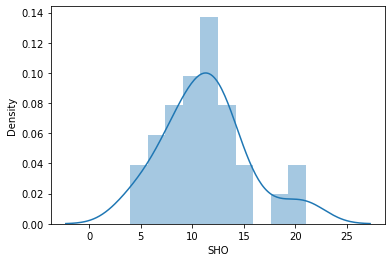

In [22]:
sb.distplot(df['SHO'], bins=10)

<AxesSubplot:xlabel='SV', ylabel='Density'>

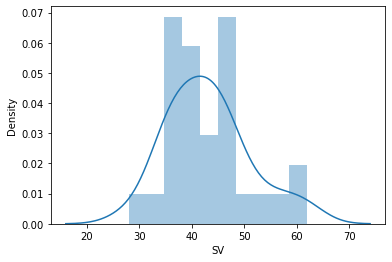

In [23]:
sb.distplot(df['SV'], bins=10)

<AxesSubplot:xlabel='E', ylabel='Density'>

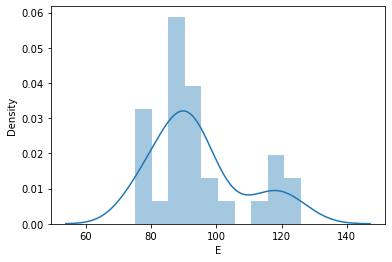

In [24]:
sb.distplot(df['E'], bins=10)

In [25]:
df.skew()

R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
W      0.047089
dtype: float64

As seen above, it is easy to notice that many columns in the dataset have skewness in them. Hence, we shall now proceed with reducing the skewness in the dataset.

In [26]:
from scipy.stats import yeojohnson

In [27]:
df["R"]=yeojohnson(df["R"],0)

In [28]:
df["AB"]=yeojohnson(df["AB"],0)

In [29]:
df["H"]=yeojohnson(df["H"],0)

In [54]:
df["2B"]=yeojohnson(df["2B"],0)

In [31]:
df["3B"]=yeojohnson(df["3B"],0)

In [32]:
df["HR"]=yeojohnson(df["HR"],0)

In [33]:
df["BB"]=yeojohnson(df["BB"],0)

In [34]:
df["SO"]=yeojohnson(df["SO"],0)

In [35]:
df["SB"]=yeojohnson(df["SB"],0)

In [36]:
df["RA"]=yeojohnson(df["RA"],0)

In [37]:
df["ER"]=yeojohnson(df["ER"],0)

In [38]:
df["ERA"]=yeojohnson(df["ERA"],0)

In [39]:
df["CG"]=yeojohnson(df["CG"],0)

In [40]:
df["SHO"]=yeojohnson(df["SHO"],0)

In [41]:
df["SV"]=yeojohnson(df["SV"],0)

In [42]:
df["E"]=yeojohnson(df["E"],0)

## Checking for outliers

R         AxesSubplot(0.125,0.657941;0.110714x0.222059)
AB     AxesSubplot(0.257857,0.657941;0.110714x0.222059)
H      AxesSubplot(0.390714,0.657941;0.110714x0.222059)
2B     AxesSubplot(0.523571,0.657941;0.110714x0.222059)
3B     AxesSubplot(0.656429,0.657941;0.110714x0.222059)
HR     AxesSubplot(0.789286,0.657941;0.110714x0.222059)
BB        AxesSubplot(0.125,0.391471;0.110714x0.222059)
SO     AxesSubplot(0.257857,0.391471;0.110714x0.222059)
SB     AxesSubplot(0.390714,0.391471;0.110714x0.222059)
RA     AxesSubplot(0.523571,0.391471;0.110714x0.222059)
ER     AxesSubplot(0.656429,0.391471;0.110714x0.222059)
ERA    AxesSubplot(0.789286,0.391471;0.110714x0.222059)
CG           AxesSubplot(0.125,0.125;0.110714x0.222059)
SHO       AxesSubplot(0.257857,0.125;0.110714x0.222059)
SV        AxesSubplot(0.390714,0.125;0.110714x0.222059)
E         AxesSubplot(0.523571,0.125;0.110714x0.222059)
W         AxesSubplot(0.656429,0.125;0.110714x0.222059)
dtype: object

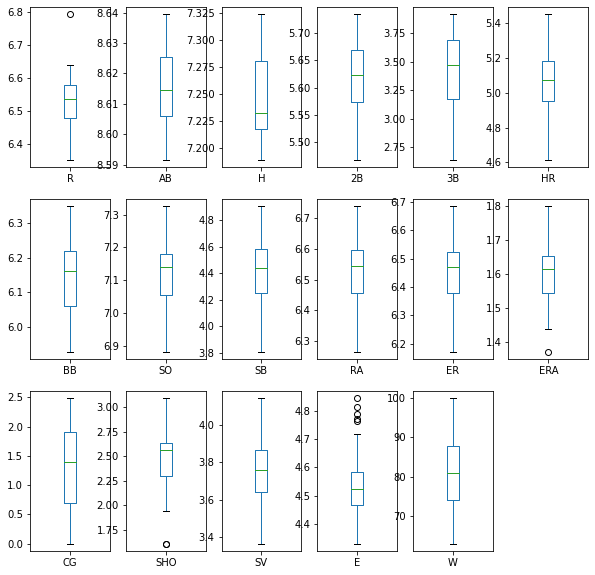

In [43]:
df.plot(kind = "box",subplots = True, layout = (3,6), figsize = (10,10))

From the above diagram, we see that the outliers are mostly present in columns E (Errors), ERA (Earned Run Average) and R (Runs Scored). Hence, we shall now proceed with removal of the outliers.

## Removal of Outliers

In [45]:
from scipy.stats import zscore

In [46]:
z=np.abs(zscore(df))
z

array([[0.66532946, 0.85033618, 1.64938177, 1.3759871 , 1.00218172,
        0.76397806, 1.63058325, 2.95292704, 0.94046306, 0.63185482,
        0.4592239 , 0.46954313, 0.27892148, 0.72910756, 1.58127344,
        0.42706021, 1.3654086 ],
       [0.17956168, 0.70869578, 0.98165584, 0.15783162, 1.13575331,
        0.15707687, 0.49319378, 0.1922134 , 0.51555076, 0.2144742 ,
        0.29705526, 0.29475616, 0.27892148, 0.32263825, 0.336185  ,
        0.59169263, 0.1978383 ],
       [0.30770406, 1.11791655, 0.13421019, 1.52796985, 0.05553116,
        0.68886098, 1.12451794, 0.87107389, 0.24069226, 0.64686055,
        0.72070964, 0.61010436, 1.76277761, 0.15516048, 0.62244106,
        1.19928939, 0.00324325],
       [1.20472969, 0.24766404, 0.38913576, 0.80917419, 0.25823697,
        0.8786901 , 1.18572331, 0.1258095 , 0.6218766 , 0.22819648,
        0.15640063, 0.09754825, 1.16561891, 0.42776132, 0.77328196,
        0.56049482, 0.48324437],
       [0.05507026, 1.27804345, 1.95148012, 0.805454

In [47]:
threshold=3
print(np.where(z>3))

(array([5], dtype=int64), array([0], dtype=int64))


In [59]:
dfcorr = df.corr()
dfcorr

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E,W
R,1.000000,0.338460,0.481814,0.561468,-0.091676,0.681924,0.384527,-0.036927,0.077510,-0.042980,-0.043207,-0.053642,0.257477,-0.122232,-0.075357,-0.015624,0.442808
AB,0.338460,1.000000,0.739235,0.458767,0.413361,-0.030873,-0.123309,-0.105664,0.376671,0.309148,0.299586,0.246473,-0.059243,-0.191168,-0.133882,0.323546,-0.088333
H,0.481814,0.739235,1.000000,0.554975,0.431208,-0.085995,-0.119461,-0.401377,0.443403,0.213476,0.239949,0.220183,0.113814,-0.125939,-0.152503,-0.032360,0.035307
2B,0.561468,0.458767,0.554975,1.000000,0.211820,0.085276,0.312713,-0.135614,0.252004,-0.222919,-0.242553,-0.260428,0.291394,0.070292,0.148385,0.129692,0.421155
3B,-0.091676,0.413361,0.431208,0.211820,1.000000,-0.399136,-0.461402,-0.128846,0.535689,0.254870,0.281578,0.274542,-0.069482,-0.052745,-0.147264,0.146147,-0.233531
HR,0.681924,-0.030873,-0.085995,0.085276,-0.399136,1.000000,0.416042,0.389241,-0.192479,-0.096807,-0.081027,-0.089783,0.200379,-0.056596,0.013309,-0.168360,0.319220
BB,0.384527,-0.123309,-0.119461,0.312713,-0.461402,0.416042,1.000000,0.238051,-0.108627,-0.409317,-0.447102,-0.454353,0.480785,0.375253,0.117572,-0.068444,0.476409
SO,-0.036927,-0.105664,-0.401377,-0.135614,-0.128846,0.389241,0.238051,1.000000,-0.012430,-0.122366,-0.159085,-0.175374,-0.109583,0.159535,0.136939,0.157704,0.086491
SB,0.077510,0.376671,0.443403,0.252004,0.535689,-0.192479,-0.108627,-0.012430,1.000000,0.145698,0.151474,0.135878,0.027194,-0.104948,-0.203746,0.139586,-0.158770
RA,-0.042980,0.309148,0.213476,-0.222919,0.254870,-0.096807,-0.409317,-0.122366,0.145698,1.000000,0.990636,0.985925,0.070079,-0.626000,-0.610172,0.200314,-0.815458


## Visualizing the correlation table

<AxesSubplot:>

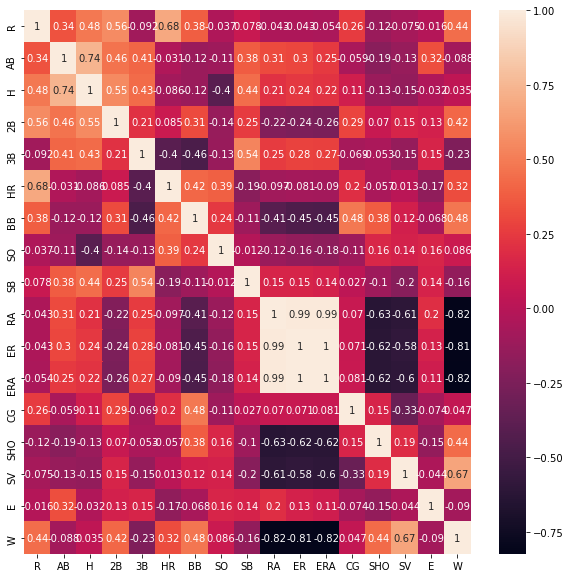

In [60]:
plt.figure(figsize = (10,10))
sb.heatmap(dfcorr, annot = True)

As seen in the above figure, it is clear to notice that not all the columns in this dataset contribute much to the W column (Wins).

Columns such as RA (Run average), ER (Earned run) and ERA (Earned run average) are negatively impacting the Win Column, where are columns such as BB (Base on balls), SHO (Shutout), SV (Save), R (Runs scored) and 2B (Double) have a positive correlation with the win column. Other columns are not affecting the Win column by much, hence we can say that they are neutrally affecting the Wins

Since columns RA, ER and ERA are heavily impacting the wins negatively, it is better to remove those columns to improve the quality of prediction

In [69]:
df.drop('RA',axis=1,inplace=True)

In [73]:
df.drop('ER',axis=1,inplace=True)

In [74]:
df.drop('ERA',axis=1,inplace=True)

In [75]:
df

,R,AB,H,2B,3B,HR,BB,SO,SB,CG,SHO,SV,E,W
0,6.586172,8.626227,7.311886,1.430220,3.761200,4.941642,5.950643,6.881411,4.653960,1.098612,2.197225,4.043051,4.488636,95
1,6.546785,8.606668,7.207860,1.422827,3.806662,5.056246,6.086775,7.142827,4.262680,1.098612,2.564949,3.828641,4.465908,83
2,6.507278,8.601534,7.241366,1.431135,3.401197,4.955827,6.280396,7.054450,4.465908,2.484907,2.397895,3.663562,4.382027,81
3,6.434547,8.618666,7.231287,1.416888,3.332205,4.919981,6.003887,7.116394,4.234107,2.079442,2.302585,3.637586,4.624973,76
4,6.536692,8.631593,7.323831,1.426770,3.912023,5.023881,6.122493,7.138867,4.430817,2.079442,2.564949,3.583519,4.465908,74
5,6.793466,8.614320,7.300473,1.432638,2.890372,5.451038,6.347389,7.049255,4.488636,2.079442,2.397895,3.555348,4.488636,93
6,6.639876,8.624791,7.242798,1.421125,2.995732,5.361292,6.318968,7.113142,4.158883,1.386294,1.609438,3.891820,4.543295,87
7,6.570883,8.609955,7.223296,1.411645,3.044522,5.384495,6.037871,7.194437,3.806662,0.000000,2.397895,3.784190,4.356709,81
8,6.469250,8.609955,7.232733,1.423163,3.496508,5.123964,6.079933,7.178545,4.477337,0.693147,2.564949,4.110874,4.564348,80
9,6.618739,8.637817,7.310550,1.428357,3.526361,5.087596,6.171701,7.046647,4.276666,1.386294,2.397895,3.713572,4.584967,78


In [76]:
df_new = df[(z<3).all(axis=1)]

In [77]:
df_new.shape

(29, 14)

In [78]:
df_new.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,CG,SHO,SV,E,W
0,6.586172,8.626227,7.311886,1.430220,3.761200,4.941642,5.950643,6.881411,4.653960,1.098612,2.197225,4.043051,4.488636,95
1,6.546785,8.606668,7.207860,1.422827,3.806662,5.056246,6.086775,7.142827,4.262680,1.098612,2.564949,3.828641,4.465908,83
2,6.507278,8.601534,7.241366,1.431135,3.401197,4.955827,6.280396,7.054450,4.465908,2.484907,2.397895,3.663562,4.382027,81
3,6.434547,8.618666,7.231287,1.416888,3.332205,4.919981,6.003887,7.116394,4.234107,2.079442,2.302585,3.637586,4.624973,76
4,6.536692,8.631593,7.323831,1.426770,3.912023,5.023881,6.122493,7.138867,4.430817,2.079442,2.564949,3.583519,4.465908,74


Now we shall forward the refined dataset for predicting the wins

## Building a Predictive Model

In this case, the Winning consists of continous values i.e - integer data types.

Hence, to predict the wins, we have to employ Linear Regression model.


In [82]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Linear Regression

In [83]:
X = df_new.drop('W', axis = 1)

In [84]:
Y = df_new['W']

In [85]:
print(X)

           R        AB         H        2B        3B        HR        BB  \
0   6.586172  8.626227  7.311886  1.430220  3.761200  4.941642  5.950643   
1   6.546785  8.606668  7.207860  1.422827  3.806662  5.056246  6.086775   
2   6.507278  8.601534  7.241366  1.431135  3.401197  4.955827  6.280396   
3   6.434547  8.618666  7.231287  1.416888  3.332205  4.919981  6.003887   
4   6.536692  8.631593  7.323831  1.426770  3.912023  5.023881  6.122493   
6   6.639876  8.624791  7.242798  1.421125  2.995732  5.361292  6.318968   
7   6.570883  8.609955  7.223296  1.411645  3.044522  5.384495  6.037871   
8   6.469250  8.609955  7.232733  1.423163  3.496508  5.123964  6.079933   
9   6.618739  8.637817  7.310550  1.428357  3.526361  5.087596  6.171701   
10  6.622736  8.614683  7.258412  1.423498  3.496508  5.153292  6.222576   
11  6.593045  8.605204  7.218177  1.423163  3.295837  5.442418  6.188264   
12  6.495266  8.597482  7.194437  1.410477  3.091042  5.176150  6.077642   
13  6.487684

In [86]:
print(Y)

0      95
1      83
2      81
3      76
4      74
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64


In [98]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.42, random_state=3)

In [102]:
X_train.shape

(16, 13)

In [104]:
Y_train.shape

(16,)

In [105]:
X_test.shape

(13, 13)

In [106]:
Y_test.shape

(13,)

In [99]:
lr=LinearRegression()
lr.fit(X_train, Y_train)
predlr = lr.predict(X_test)

In [100]:
lr.score(X_train,Y_train)

0.9474663153938131

In [107]:
lr.coef_

array([  89.43775961,  109.1217227 , -161.35638393,   -6.72910237,
         -4.76333604,   -8.2035398 ,   -7.27776111,  -42.55375295,
          5.83525584,    3.31700991,    7.02295802,   24.8130245 ,
        -14.63769465])

In [108]:
lr.intercept_

66.86232514188714

## Mean Squared Error and Mean Absolute Error

In [90]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [91]:
print("Mean Squared Error: ", mean_squared_error(Y_test,predlr))

Mean Squared Error:  95.69398598582825


In [111]:
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(Y_test,predlr)))

Root Mean Squared Error:  9.782330294251377


In [92]:
print("Mean Absolute Error: ", mean_absolute_error(Y_test,predlr))

Mean Absolute Error:  7.782427700157911


## r2 Score

In [93]:
from sklearn.metrics import r2_score

In [94]:
r2_score(Y_test,predlr)

0.3904152419297032